# Week 5: Plastic sites and spatial aggregation
The **objective** of today's lecture is to practice, once again, the access and analysis of spatial data from HTTP requests.

In [1]:
import geopandas
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
gdf = geopandas.read_file("https://api.dev.plastic.watch.earthrise.media/sites")
gdf = geopandas.read_file("https://api.dev.plastic.watch.earthrise.media/sites?limit=3000")

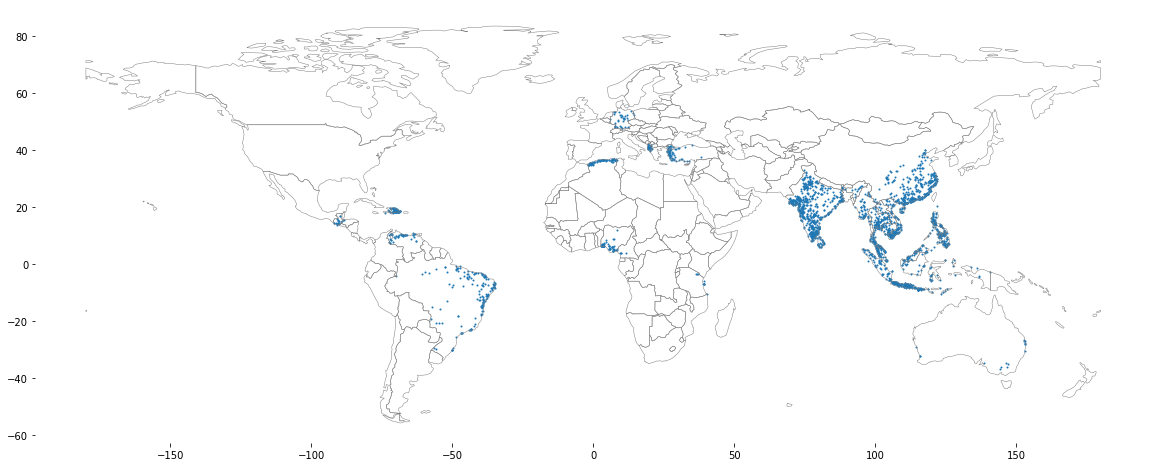

In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world.continent != "Antarctica"]

fig, ax = plt.subplots(figsize=(20,10))

world.boundary.plot(
    ax=ax,
    color="grey",
    linewidth=0.5
)

gdf.plot(
    ax=ax,
    markersize=1
)

# we don't need to see the latitude and longitude for the global map
# we have all the context we need
plt.box(on=None)

In [4]:
count_df = gdf.groupby("country")["geometry"].count()
count_df = count_df.reset_index().rename(columns={'geometry': 'ct'})

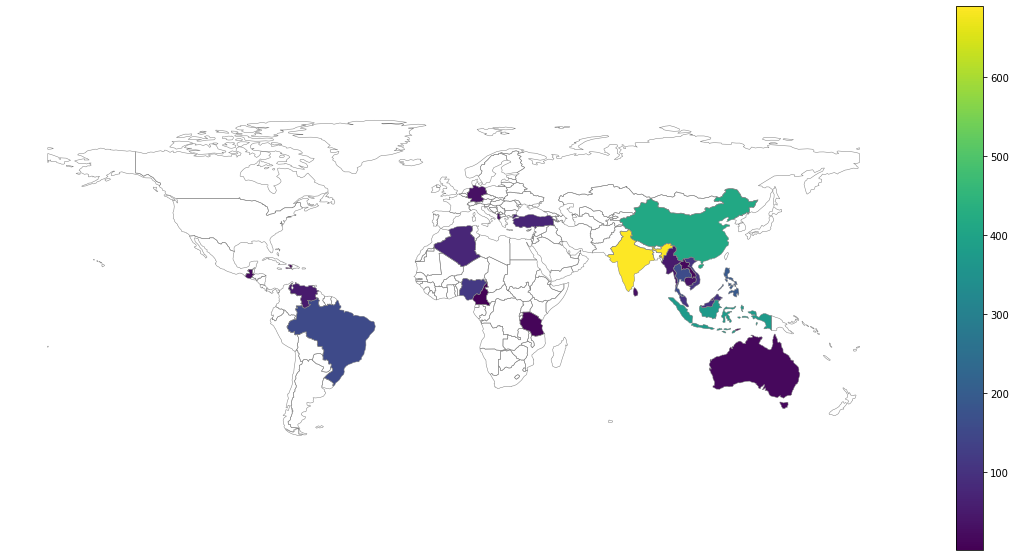

In [5]:
subset_df = world.merge(count_df, left_on="name", right_on="country", how="right")
subset_df = subset_df.dropna()

fig, ax = plt.subplots(figsize=(20,10))

world.boundary.plot(
    ax=ax,
    color="grey",
    linewidth=0.5
)

subset_df.plot(
    ax=ax,
    column="ct",
    legend=True
)

ax.set_axis_off()

In [6]:
X = gdf[[
    "Distance to Waterway (m)",
    "Elevation",
    "Population - 1 km",
    "Fine Earth Density (kg / m^3)",
    "Soil Sand Fraction",
    "area"
]]
X = X.values

In [7]:
from sklearn.cluster import AgglomerativeClustering
# the distance between points is given by `euclidean` while the clusters 
# are defined by minimizing variance using the Ward method.
cluster = AgglomerativeClustering(
    n_clusters=8, 
    affinity='euclidean', 
    linkage='ward'
)

# assign a new column based on the label and print the values in the new column
gdf["label"] = cluster.fit_predict(X)

# what are the different labels?
set(gdf["label"])

{0, 1, 2, 3, 4, 5, 6, 7}

<AxesSubplot:>

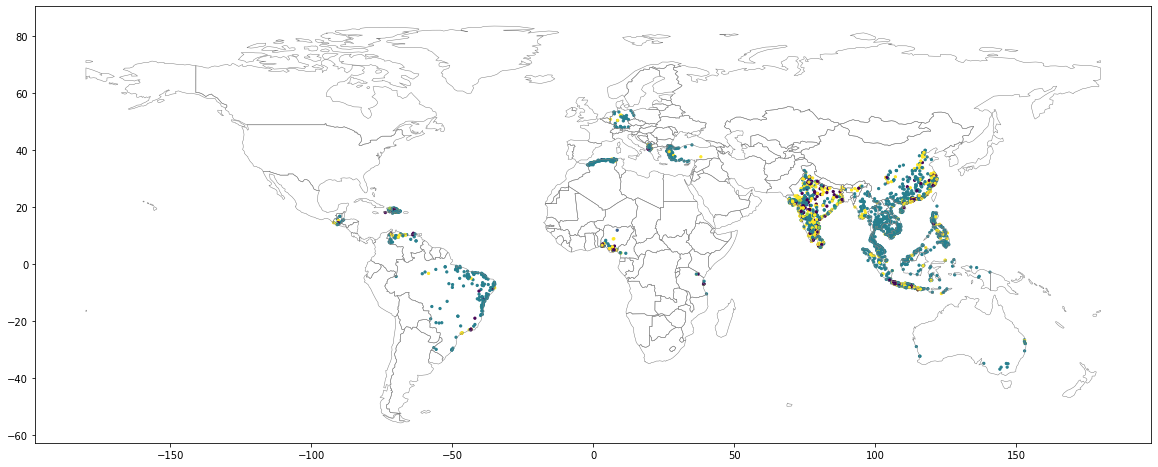

In [8]:
fig, ax = plt.subplots(figsize=(20,10))

world.boundary.plot(
    ax=ax,
    color="grey",
    linewidth=0.5
)

gdf.plot(
    ax=ax,
    markersize=5,
    column="label"
)

<AxesSubplot:>

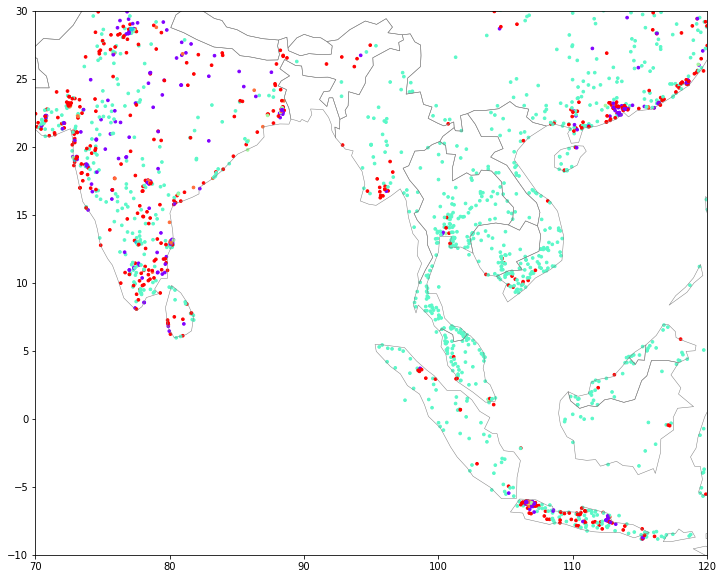

In [9]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_xlim([70, 120])
ax.set_ylim([-10, 30])

world.boundary.plot(
    ax=ax,
    color="grey",
    linewidth=0.5
)

gdf.plot(
    ax=ax,
    markersize=7,
    column="label",
    cmap="rainbow"
)